<a href="https://colab.research.google.com/github/karinacasola/Analise_de_dados_com_Python/blob/master/Dataset_cGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, balanced_accuracy_score,classification_report, ConfusionMatrixDisplay


In [ ]:
from tensorflow import keras
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, Concatenate
from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D, LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.initializers import RandomNormal
import keras.backend as K

# Datasets:

[Dataset DefenseDroid](https://https://github.com/Malware-Hunter/datasets/blob/main/limpos/defenseDroid_permissios_recievers_services.csv)


[Dataset Drebin](https://github.com/Malware-Hunter/datasets/blob/main/limpos/drebin215_permissions_apiCalls_intents.csv)


In [ ]:
np.random.seed(1635848)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pré-processamento



In [ ]:
df = pd.read_csv('/content/defenseDroid_permissios_recievers_services.csv')
df.head()

,permission.GetuiService.com.glodon.ynjtapp,permission.COLLECT_METRICS,permission.sec.MDM_PHONE_RESTRICTION,permission.MEDIA_MOUNTED,permission.USAGE_ACCESS_SETTINGS,permission.VOIP_BROADCAST_VOIP_INTENTS,permission.GetuiService.com.huamaitel.client.yun,permission.CLIENT,permission.GetuiService.pailiefive.main,permission.RESTART_PxCKAGES,...,GetuiPushService,SandboxedProcessService3,service.SmsService,ActionService,ThemeLiveWallPaperService,SandboxedProcessService2,service.GcmService,ChannelService$KernelService,SampleDownloaderService,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.head()

,permission.GetuiService.com.glodon.ynjtapp,permission.COLLECT_METRICS,permission.sec.MDM_PHONE_RESTRICTION,permission.MEDIA_MOUNTED,permission.USAGE_ACCESS_SETTINGS,permission.VOIP_BROADCAST_VOIP_INTENTS,permission.GetuiService.com.huamaitel.client.yun,permission.CLIENT,permission.GetuiService.pailiefive.main,permission.RESTART_PxCKAGES,...,GetuiPushService,SandboxedProcessService3,service.SmsService,ActionService,ThemeLiveWallPaperService,SandboxedProcessService2,service.GcmService,ChannelService$KernelService,SampleDownloaderService,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df['class'].value_counts()

1    6000
0    5975
Name: class, dtype: int64

In [ ]:
df.dropna()

,permission.GetuiService.com.glodon.ynjtapp,permission.COLLECT_METRICS,permission.sec.MDM_PHONE_RESTRICTION,permission.MEDIA_MOUNTED,permission.USAGE_ACCESS_SETTINGS,permission.VOIP_BROADCAST_VOIP_INTENTS,permission.GetuiService.com.huamaitel.client.yun,permission.CLIENT,permission.GetuiService.pailiefive.main,permission.RESTART_PxCKAGES,...,GetuiPushService,SandboxedProcessService3,service.SmsService,ActionService,ThemeLiveWallPaperService,SandboxedProcessService2,service.GcmService,ChannelService$KernelService,SampleDownloaderService,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(df.drop('class', 1))
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<ipython-input-11-7098a25ddc4b>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = scaler.fit_transform(df.drop('class', 1))


In [ ]:
X

array([[-0.00913861, -0.02238962, -0.01582987, ..., -0.03032202,
        -0.12966276, -0.03167164],
       [-0.00913861, -0.02238962, -0.01582987, ..., -0.03032202,
        -0.12966276, -0.03167164],
       [-0.00913861, -0.02238962, -0.01582987, ..., -0.03032202,
        -0.12966276, -0.03167164],
       ...,
       [-0.00913861, -0.02238962, -0.01582987, ..., -0.03032202,
        -0.12966276, -0.03167164],
       [-0.00913861, -0.02238962, -0.01582987, ..., -0.03032202,
        -0.12966276, -0.03167164],
       [-0.00913861, -0.02238962, -0.01582987, ..., -0.03032202,
        -0.12966276, -0.03167164]])

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

# cGAN


In [ ]:
class cGAN():
    
    """
     Classe contendo 3 métodos (e __init__): generator, discriminator e train.
     O gerador é treinado usando ruído aleatório e rótulo como entradas. Discriminador é treinado
     usando amostras e rótulos reais/falsos como entradas.
    """
    
    def __init__(self,latent_dim=32, out_shape=2938):
        
        self.latent_dim = latent_dim
        self.out_shape = out_shape 
        self.num_classes = 2
        # usando Adam como otimizador
        optimizer = Adam(0.0002, 0.5)
        
        # construindo o discriminador
        self.discriminator = self.discriminator()
        self.discriminator.compile(loss=['binary_crossentropy'],
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        # construindo o gerador
        self.generator = self.generator()

        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,))
        gen_samples = self.generator([noise, label])
        
       # não treinamos o discriminador ao treinar o gerador
        self.discriminator.trainable = False
        valid = self.discriminator([gen_samples, label])

       # combinando os dois modelos
        self.combined = Model([noise, label], valid)
        self.combined.compile(loss=['binary_crossentropy'],
                              optimizer=optimizer,
                             metrics=['accuracy'])


    def generator(self):
        init = RandomNormal(mean=0.0, stddev=0.02)
        model = Sequential()

        model.add(Dense(128, input_dim=self.latent_dim))
        model.add(Dropout(0.2))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(256))
        model.add(Dropout(0.2))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(512))
        model.add(Dropout(0.2))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(self.out_shape, activation='tanh'))

        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(Embedding(self.num_classes, self.latent_dim)(label))
        
        model_input = multiply([noise, label_embedding])
        gen_sample = model(model_input)

        return Model([noise, label], gen_sample, name="Generator")

    
    def discriminator(self):
        init = RandomNormal(mean=0.0, stddev=0.02)
        model = Sequential()

        model.add(Dense(512, input_dim=self.out_shape, kernel_initializer=init))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Dense(256, kernel_initializer=init))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        
        model.add(Dense(128, kernel_initializer=init))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        
        model.add(Dense(1, activation='sigmoid'))
        
        gen_sample = Input(shape=(self.out_shape,))
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(Embedding(self.num_classes, self.out_shape)(label))

        model_input = multiply([gen_sample, label_embedding])
        validity = model(model_input)

        return Model(inputs=[gen_sample, label], outputs=validity, name="Discriminator")


    def train(self, X_train, y_train, pos_index, neg_index, epochs, sampling=False, batch_size=32, sample_interval=100, plot=True): 
        
        # embora não recomendado, definir perdas como globais ajuda na análise do nosso cgan fora da classe
        global G_losses
        global D_losses
        
        G_losses = []
        D_losses = []
       # Verdades básicas adversárias
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):
            
            # if sample==True --> treina o discriminador com 8 amostras da classe positiva e o resto com classe negativa
            if sampling:
                idx1 = np.random.choice(pos_index, 8)
                idx0 = np.random.choice(neg_index, batch_size-8)
                idx = np.concatenate((idx1, idx0))
            # if sample!=True --> treina o discriminador usando instâncias aleatórias em lotes de 32
            else:
                idx = np.random.choice(len(y_train), batch_size)
            samples, labels = X_train[idx], y_train[idx]
            samples, labels = shuffle(samples, labels)
            
            # Amostra de ruído como entrada do gerador
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_samples = self.generator.predict([noise, labels])

            # alisamento de rótulo
            if epoch < epochs//1.5:
                valid_smooth = (valid+0.1)-(np.random.random(valid.shape)*0.1)
                fake_smooth = (fake-0.1)+(np.random.random(fake.shape)*0.1)
            else:
                valid_smooth = valid 
                fake_smooth = fake
                
            # Treinando o discriminator
            self.discriminator.trainable = True
            d_loss_real = self.discriminator.train_on_batch([samples, labels], valid_smooth)
            d_loss_fake = self.discriminator.train_on_batch([gen_samples, labels], fake_smooth)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Treinando o Generator
            self.discriminator.trainable = False
            sampled_labels = np.random.randint(0, 2, batch_size).reshape(-1, 1)
            # Treinando o generator
            g_loss = self.combined.train_on_batch([noise, sampled_labels], valid)

            if (epoch+1)%sample_interval==0:
                print('[%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f'
                  % (epoch, epochs, d_loss[0], g_loss[0]))
            G_losses.append(g_loss[0])
            D_losses.append(d_loss[0])
            if plot:
                if epoch+1==epochs:
                    plt.figure(figsize=(10,5))
                    plt.title("Generator and Discriminator Loss")
                    plt.plot(G_losses,label="G")
                    plt.plot(D_losses,label="D")
                    plt.xlabel("iterations")
                    plt.ylabel("Loss")
                    plt.legend()
                    plt.show()

In [ ]:
lgb_1 = lgb.LGBMClassifier()
lgb_1.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
y_pred = lgb_1.predict(X_test)

# evaluation
print(classification_report(y_test, y_pred))

plt.show()

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1151
           1       0.96      0.89      0.92      1244

    accuracy                           0.92      2395
   macro avg       0.92      0.92      0.92      2395
weighted avg       0.92      0.92      0.92      2395



# Treinando cGAN

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


1/1 [==============================] - 0s 26ms/step
[99/600]	Loss_D: 0.6306	Loss_G: 0.7562
1/1 [==============================] - 0s 20ms/step
[199/600]	Loss_D: 0.5982	Loss_G: 0.8534
1/1 [==============================] - 0s 18ms/step
[299/600]	Loss_D: 0.5423	Loss_G: 1.1716
1/1 [==============================] - 0s 19ms/step
[399/600]	Loss_D: 0.2234	Loss_G: 1.6526
1/1 [==============================] - 0s 19ms/step
[499/600]	Loss_D: 0.3392	Loss_G: 1.1859
1/1 [==============================] - 0s 23ms/step
[599/600]	Loss_D: 0.1946	Loss_G: 0.7703


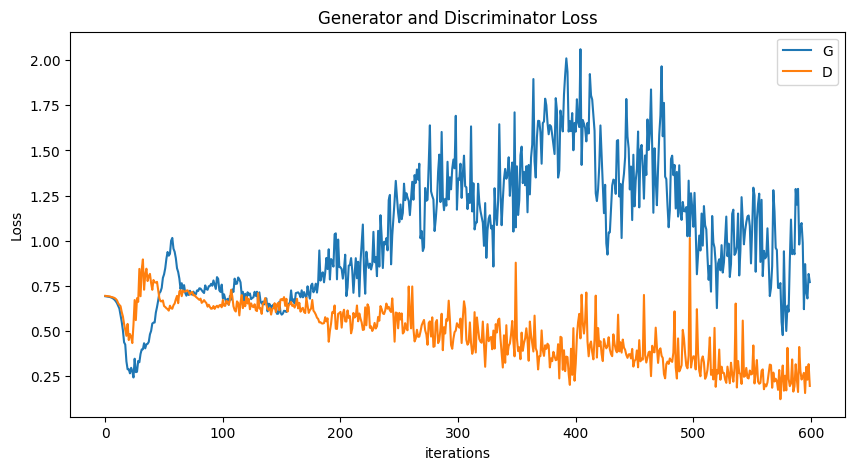

In [ ]:
cgan = cGAN()
y_train = y_train.reshape(-1,1)
pos_index = np.where(y_train==1)[0]
neg_index = np.where(y_train==0)[0]
cgan.train(X_train, y_train, pos_index, neg_index, epochs=600)

# Gerando novas instâncias

In [ ]:
noise = np.random.normal(0, 1, (19758, 32))
sampled_labels = np.zeros(19758).reshape(-1, 1)


gen_samples = cgan.generator.predict([noise, sampled_labels])

gen_df = pd.DataFrame(data = gen_samples,
                      columns = df.drop('class',1).columns)

618/618 [==============================] - 3s 4ms/step


<ipython-input-18-722890482f20>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  columns = df.drop('class',1).columns)


In [ ]:

noise_2 = np.random.normal(0, 1, (6290, 32))
sampled_labels_2 = np.ones(6290).reshape(-1, 1)


gen_samples_2 = cgan.generator.predict([noise_2, sampled_labels_2])

gen_df_2 = pd.DataFrame(data = gen_samples_2,
                      columns = df.drop('class',1).columns)

197/197 [==============================] - 1s 5ms/step


<ipython-input-21-012c28cce85f>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  columns = df.drop('class',1).columns)


In [ ]:
gen_df_2

,permission.GetuiService.com.glodon.ynjtapp,permission.COLLECT_METRICS,permission.sec.MDM_PHONE_RESTRICTION,permission.MEDIA_MOUNTED,permission.USAGE_ACCESS_SETTINGS,permission.VOIP_BROADCAST_VOIP_INTENTS,permission.GetuiService.com.huamaitel.client.yun,permission.CLIENT,permission.GetuiService.pailiefive.main,permission.RESTART_PxCKAGES,...,service.SyncService,GetuiPushService,SandboxedProcessService3,service.SmsService,ActionService,ThemeLiveWallPaperService,SandboxedProcessService2,service.GcmService,ChannelService$KernelService,SampleDownloaderService
0,0.187107,-0.767341,0.285914,-0.235982,-0.401168,-0.419776,0.109095,0.015533,-0.028578,0.083163,...,0.274449,-0.681199,0.166857,-0.078203,-0.834828,0.691806,0.679635,-0.287857,-0.280388,-0.172469
1,-0.337584,0.455222,0.256730,-0.029146,0.439504,-0.537644,-0.003273,-0.378864,0.358990,0.360615,...,-0.182765,-0.393107,-0.400955,-0.594106,0.456475,-0.880009,0.314920,-0.515998,-0.658683,0.491022
2,0.377697,-0.784886,-0.416456,-0.130620,0.385334,-0.629578,0.064785,0.330171,-0.288064,-0.541575,...,0.069167,0.706461,-0.638092,0.335461,-0.643916,0.178881,-0.497456,-0.311473,-0.756085,-0.198090
3,0.047109,-0.107111,-0.607932,0.041870,0.321631,-0.634134,-0.195374,0.205365,0.697392,0.365193,...,-0.022872,-0.260077,-0.062219,-0.661716,0.246951,-0.037855,0.351625,0.029713,-0.833701,0.352800
4,0.258051,0.255134,0.200587,0.043675,-0.389818,0.318125,0.440521,0.285915,-0.467296,0.155766,...,0.051136,-0.149342,0.293623,-0.570549,-0.039820,-0.042659,0.702903,0.591204,0.623894,0.033795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6285,-0.430606,0.059927,-0.231029,-0.137828,0.355039,-0.571048,-0.223692,0.682237,0.691605,0.485955,...,-0.627434,0.657096,-0.327017,0.489349,-0.424716,-0.383255,0.498787,-0.501733,-0.415070,-0.229365
6286,-0.259554,-0.417583,-0.426861,-0.440158,0.051746,-0.128648,-0.169787,0.005565,0.111254,-0.467688,...,0.343415,-0.010023,0.389273,-0.110280,0.345561,-0.039729,-0.619102,-0.043563,0.302342,-0.286247
6287,0.059082,0.260046,-0.285717,-0.462521,0.011286,-0.100935,-0.352151,-0.191287,0.223825,-0.150403,...,-0.325411,-0.407430,-0.080000,-0.206489,-0.024340,0.574034,0.156840,-0.086126,-0.434387,0.447853
6288,-0.077577,0.584174,0.173874,0.507174,0.593200,0.378998,-0.190930,-0.483318,-0.180343,0.662873,...,0.105143,0.255340,0.100555,-0.656142,0.623699,-0.565797,0.322404,-0.449180,0.374195,0.090740


# Combinando instâncias geradas em um dataframe

In [ ]:
gen_df_2['class'] = 1
gen_df['class']=0

df_gan = pd.concat([gen_df_2, gen_df], ignore_index=True, sort=False)
df_gan = df_gan.sample(frac=1).reset_index(drop=True)

X_train_2 = df_gan.drop('class', 1)
y_train_2 = df_gan['class'].values

<ipython-input-23-ed8d2e916684>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_2 = df_gan.drop('class', 1)


In [ ]:
df_gan

,permission.GetuiService.com.glodon.ynjtapp,permission.COLLECT_METRICS,permission.sec.MDM_PHONE_RESTRICTION,permission.MEDIA_MOUNTED,permission.USAGE_ACCESS_SETTINGS,permission.VOIP_BROADCAST_VOIP_INTENTS,permission.GetuiService.com.huamaitel.client.yun,permission.CLIENT,permission.GetuiService.pailiefive.main,permission.RESTART_PxCKAGES,...,GetuiPushService,SandboxedProcessService3,service.SmsService,ActionService,ThemeLiveWallPaperService,SandboxedProcessService2,service.GcmService,ChannelService$KernelService,SampleDownloaderService,class
0,0.169003,0.467064,0.255057,0.018503,-0.118868,-0.069241,0.097404,-0.343009,-0.130724,0.158678,...,0.134779,0.146530,-0.074358,0.050446,-0.318784,0.249100,0.004725,-0.293185,0.269487,0
1,0.228975,0.104380,-0.270932,-0.106864,-0.549130,0.042878,-0.164777,0.024063,0.058909,-0.369116,...,0.175807,0.199745,0.313606,0.180438,0.244058,-0.182112,-0.104592,0.231063,-0.543107,0
2,-0.166426,0.028151,-0.321682,-0.012244,0.421824,-0.311151,-0.294591,-0.642485,-0.015063,0.465332,...,-0.492064,-0.048815,0.010229,0.205950,-0.412180,0.017333,-0.375259,0.038917,0.413917,0
3,-0.264361,0.465309,-0.515859,-0.271025,0.144646,-0.341967,-0.339841,-0.264381,0.200769,0.193412,...,0.231131,0.394217,-0.148791,0.431905,0.097762,0.216452,-0.001508,-0.369422,-0.215650,0
4,-0.182313,-0.338406,0.269072,-0.226079,0.346012,0.341691,0.440891,0.405345,0.433207,0.636311,...,-0.411752,-0.247363,-0.000749,-0.724633,-0.694045,-0.328334,-0.822222,0.820891,-0.158390,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,0.010372,-0.110938,-0.021859,-0.235999,-0.334249,0.111423,0.059100,-0.099704,-0.095213,0.238141,...,-0.247227,-0.257813,-0.011839,0.253281,0.368160,-0.158132,0.400204,0.130567,0.172607,0
26044,0.309302,0.114858,-0.137028,0.186939,-0.249929,-0.218656,-0.249908,0.158329,0.495288,0.381382,...,0.245824,-0.032141,0.202274,-0.355274,-0.119056,0.135200,-0.472922,-0.434446,-0.122239,0
26045,0.202856,-0.023930,0.149520,0.037396,-0.246027,0.097090,-0.150410,0.243088,-0.364594,-0.139217,...,0.335166,0.105385,0.198812,0.091034,-0.087433,0.037454,0.213871,0.074014,-0.396866,0
26046,0.383524,0.054547,-0.170970,-0.063752,0.069317,-0.362391,-0.121553,-0.227668,0.157756,0.349453,...,-0.177722,0.220988,-0.111603,0.237838,-0.158060,0.329656,0.025300,-0.180467,-0.226944,0


# Classificando testset usando trainset gerado



In [ ]:
lgb_1 = lgb.LGBMClassifier()
lgb_1.fit(X_train_2, y_train_2)


y_pred = lgb_1.predict(X_test)

print(classification_report(y_test, y_pred))
plt.show()

              precision    recall  f1-score   support

           0       0.69      0.97      0.81      1151
           1       0.96      0.60      0.74      1244

    accuracy                           0.78      2395
   macro avg       0.82      0.79      0.77      2395
weighted avg       0.83      0.78      0.77      2395



# Experimentos

Este experimento utiliza a (cGAN) para gerar novas instâncias de dados sintéticos e depois é passado o algoritmo de aprendizado de máquina (LGBMClassifier) para avaliar e classificar o desempenho. 

A cGAN é criada com um tamanho de dimensão latente (latent_d) e um formato de saída (out_sh). Os dados de entrada (df_new) são normalizados utilizando um objeto Scaler e separados em um conjunto de treinamento (80%) e um conjunto de teste (20%).

O loop principal é executado cinco vezes, e em cada iteração, a cGAN é treinada com os dados de treinamento e seus índices positivos e negativos correspondentes (pos_index e neg_index). Em seguida, a cGAN é usada para gerar duas novas amostras de dados sintéticos, uma com um número de instâncias positivas (gen_df) e outra com um número de instâncias negativas (gen_df_2).

As novas amostras geradas são rotuladas como 1 (positivo) e 0 (negativo), respectivamente. As duas amostras geradas são combinadas em um único conjunto de dados sintéticos (df_gan), que é aleatoriamente embaralhado (sample(frac=1)) e usado para treinar o algoritmo LGBMClassifier.

O desempenho do algoritmo LGBMClassifier é avaliado usando as amostras de teste. Em cada iteração, a perda do gerador e do discriminador é armazenada em G_loss e D_loss, e o desempenho da classificação é armazenado em bal_acc e acc, que representam a acurácia balanceada e a acurácia, respectivamente.

Após o loop, os valores médios de perda do gerador e do discriminador são calculados.

In [ ]:
def generate_instances(df_new, cgan,num_instances,label_class,label='class'):
    noise = np.random.normal(0, 1, (num_instances, 32))
    
    if label_class==0:
        sampled_labels = np.zeros(num_instances).reshape(-1, 1)
        gen_samples = cgan.generator.predict([noise, sampled_labels])
    else:
        sampled_labels = np.zeros(num_instances).reshape(-1, 1)
        gen_samples = cgan.generator.predict([noise, sampled_labels])
        
    gen_df = pd.DataFrame(data = gen_samples,
                          columns = df_new.drop(label,1).columns)
    return gen_df

In [ ]:
def run_experiment(df_new, pos_num_inst, neg_num_inst, num_epochs, out_sh, latent_d=32, label_f='class'):
    
    global bal_acc, acc, G_loss, D_loss
    G_loss = []
    D_loss = []
    bal_acc = []
    acc = []


    '''
O trecho de código começa com a normalização dos dados de entrada X usando o objeto scaler,
 que é um objeto da classe StandardScaler do pacote sklearn.preprocessing. 
 A função fit_transform é usada para ajustar os dados de entrada ao objeto scaler e retornar a matriz transformada X.

Em seguida, o código define o vetor de saída y como a coluna rotulada label_f do dataframe df_new. 
Em seguida, a função train_test_split do pacote sklearn.model_selection 
é usada para dividir os dados normalizados X e os rótulos y em conjuntos de treinamento e teste. 
O conjunto de teste tem 20% dos dados.

Depois disso, o código define um modelo cgan usando a classe cGAN 
com o número de dimensões latentes latent_d e a forma de saída out_sh. 
Em seguida, o vetor de rótulos y_train 
é remodelado como uma matriz com uma coluna e as posições positivas e negativas 
do vetor y_train são armazenadas em pos_index e neg_index, 
respectivamente.

O loop for começa agora e será executado 5 vezes. A cada execução,
 uma nova impressão é feita para informar o número da execução atual.

'''
    
    X = scaler.fit_transform(df_new.drop(label_f, 1))
    y = df_new[label_f].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    cgan=cGAN(latent_dim=latent_d, out_shape=out_sh)
    y_train = y_train.reshape(-1,1)
    pos_index = np.where(y_train==1)[0]
    neg_index = np.where(y_train==0)[0]
    
    for i in range(5):
        print(str(i+1)+". RUN")
        
        cgan.train(X_train, y_train, pos_index, neg_index, epochs=num_epochs, plot=False)
        gen_df = generate_instances(df_new, cgan=cgan,num_instances=pos_num_inst, label_class=1, label=label_f)
        gen_df_2 = generate_instances(df_new,cgan=cgan, num_instances=neg_num_inst, label_class=0, label=label_f)
        
        gen_df[label_f] = 1
        gen_df_2[label_f] = 0

        df_gan = pd.concat([gen_df_2, gen_df], ignore_index=True, sort=False)
        df_gan = df_gan.sample(frac=1).reset_index(drop=True)

        X_train_2 = df_gan.drop(label_f, 1)
        y_train_2 = df_gan[label_f].values
        
        lgb_1 = lgb.LGBMClassifier()
        lgb_1.fit(X_train_2, y_train_2)
        
        y_pred = lgb_1.predict(X_test)
        
        G_loss.append(G_losses)
        D_loss.append(D_losses)
        
        bal_acc.append(balanced_accuracy_score(y_test, y_pred))
        acc.append(accuracy_score(y_test, y_pred))
        
        print("Bal_Acc:", bal_acc[i])
        print("Acc:", acc[i])
      '''Essas linhas de código calculam a perda média do gerador e do discriminador 
         ao longo de todas as iterações do loop anterior.'''  
   
   '''O zip retorna um iterador que produz tuplas contendo um elemento de cada uma das 
   listas passadas como parâmetro, na ordem em que as listas foram passadas.'''  
   
    Sum_G_loss = [sum(x) for x in zip(*G_loss)]    
    Sum_D_loss = [sum(x) for x in zip(*D_loss)]
    Avg_G_loss = [x / 5 for x in Sum_G_loss]
    Avg_D_loss = [x / 5 for x in Sum_D_loss]
    '''
Primeiro, zip(*G_loss) e zip(*D_loss) são usados para transpor 
a lista de perdas de cada iteração, de modo que a primeira lista contenha todas as primeiras perdas, 
a segunda lista contenha todas as segundas perdas e assim por diante. Em seguida, a função sum é usada 
para somar as perdas de todas as iterações para gerar Sum_G_loss e Sum_D_loss.

Finalmente, a média das perdas de cada iteração é calculada, dividindo as somas 
das perdas pelo número de iterações (5 neste caso), gerando Avg_G_loss e Avg_D_loss. 
O resultado é uma lista de valores que representam a perda média do gerador e do discriminador 
ao longo das iterações do loop anterior, o que pode ser usado para avaliar a performance do modelo.

'''


    plt.figure(figsize=(10,5))
    plt.title("Perda Média do Gerador e Discriminador")
    plt.plot(Avg_G_loss,label="G")
    plt.plot(Avg_D_loss,label="D")
    plt.xlabel("iterações")
    plt.ylabel("Perda")
    plt.legend()
    plt.show()

Este trecho **( for i in range(5):**
        **print(str(i+1)+". RUN"))**   representa o loop principal do experimento, que executa cinco iterações de treinamento do modelo cGAN e classificador LightGBM, cada uma com um conjunto de dados sintético diferente gerado pelo modelo cGAN. O processo de treinamento é feito da seguinte maneira:
A função cgan.train() é chamada para treinar o modelo cGAN com o conjunto de treinamento (X_train) e os rótulos correspondentes (y_train). A função recebe também pos_index e neg_index, que são os índices dos exemplos positivos (classe minoritária) e negativos (classe majoritária) no conjunto de treinamento, respectivamente. O número de épocas de treinamento é especificado por num_epochs.

Duas vezes, a função generate_instances() é chamada para gerar exemplos sintéticos. Na primeira chamada, a função gera pos_num_inst exemplos positivos (label_class = 1), enquanto na segunda chamada ela gera neg_num_inst exemplos negativos (label_class = 0), ambos usando o modelo cGAN treinado na iteração atual.

Os exemplos sintéticos gerados são adicionados aos exemplos reais para criar um novo conjunto de dados sintético (df_gan), onde as primeiras linhas correspondem aos exemplos negativos e as restantes aos exemplos positivos. Os rótulos das linhas geradas (gen_df e gen_df_2) são definidos para 1 e 0, respectivamente.

O conjunto de dados sintético é embaralhado e dividido em dois conjuntos: treinamento (X_train_2 e y_train_2) e teste (X_test e y_test), com a mesma proporção que o conjunto de dados original.

Um novo classificador LightGBM (lgb_1) é criado e treinado com o conjunto de treinamento sintético (X_train_2 e y_train_2).

O classificador treinado é usado para fazer previsões no conjunto de teste sintético (X_test), e as métricas de desempenho, precisão e acurácia balanceada são calculadas e armazenadas em acc e bal_acc.

O erro do gerador (G_losses) e do discriminador (D_losses) durante o treinamento do modelo cGAN são armazenados em G_loss e D_loss, respectivamente.

O loop é executado cinco vezes e, no final, as médias dos erros do gerador e do discriminador (Avg_G_loss e Avg_D_loss) são calculadas usando Sum_G_loss e Sum_D_loss, que são somas acumuladas de G_loss e D_loss. As métricas de desempenho (acc e bal_acc) são usadas para avaliar o desempenho do modelo em todos os conjuntos de teste sintéticos.
        






<ipython-input-45-3eb0ab13a880>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = scaler.fit_transform(df_new.drop(label_f, 1))
/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


1. RUN
1/1 [==============================] - 0s 21ms/step
[99/2000]	Loss_D: 0.6868	Loss_G: 0.6728
1/1 [==============================] - 0s 26ms/step
[199/2000]	Loss_D: 0.6964	Loss_G: 0.7019
1/1 [==============================] - 0s 22ms/step
[299/2000]	Loss_D: 0.6218	Loss_G: 0.8025
1/1 [==============================] - 0s 22ms/step
[399/2000]	Loss_D: 0.3889	Loss_G: 1.0343
1/1 [==============================] - 0s 25ms/step
[499/2000]	Loss_D: 0.2051	Loss_G: 2.0050
1/1 [==============================] - 0s 21ms/step
[599/2000]	Loss_D: -0.2696	Loss_G: 3.2065
1/1 [==============================] - 0s 22ms/step
[699/2000]	Loss_D: -1.0826	Loss_G: 9.9060
1/1 [==============================] - 0s 26ms/step
[799/2000]	Loss_D: -2.6449	Loss_G: 19.3955
1/1 [==============================] - 0s 24ms/step
[899/2000]	Loss_D: -6.2404	Loss_G: 36.5857
1/1 [==============================] - 0s 23ms/step
[999/2000]	Loss_D: -2.6322	Loss_G: 38.2088
1/1 [==============================] - 0s 22ms/step
[109

<ipython-input-44-6e210c527f2c>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  columns = df_new.drop(label,1).columns)


618/618 [==============================] - 2s 3ms/step


<ipython-input-44-6e210c527f2c>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  columns = df_new.drop(label,1).columns)
<ipython-input-45-3eb0ab13a880>:31: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_2 = df_gan.drop(label_f, 1)


Bal_Acc: 0.5000435504707562
Acc: 0.7543374788883771
2. RUN
1/1 [==============================] - 0s 47ms/step
[99/2000]	Loss_D: -30.4189	Loss_G: 456.2279
1/1 [==============================] - 0s 143ms/step
[199/2000]	Loss_D: -134.6779	Loss_G: 28.4382
1/1 [==============================] - 0s 23ms/step
[299/2000]	Loss_D: -208.3370	Loss_G: 118.0100
1/1 [==============================] - 0s 37ms/step
[399/2000]	Loss_D: -463.4206	Loss_G: 93.7468
1/1 [==============================] - 0s 33ms/step
[499/2000]	Loss_D: -483.2666	Loss_G: 83.8005
1/1 [==============================] - 0s 35ms/step
[599/2000]	Loss_D: -183.3637	Loss_G: 100.6902
1/1 [==============================] - 0s 35ms/step
[699/2000]	Loss_D: -470.4921	Loss_G: 132.0652
1/1 [==============================] - 0s 31ms/step
[799/2000]	Loss_D: -520.8520	Loss_G: 140.0600
1/1 [==============================] - 0s 46ms/step
[899/2000]	Loss_D: -584.5282	Loss_G: 149.3505
1/1 [==============================] - 0s 34ms/step
[999/2000]	

<ipython-input-44-6e210c527f2c>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  columns = df_new.drop(label,1).columns)


618/618 [==============================] - 2s 3ms/step


<ipython-input-44-6e210c527f2c>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  columns = df_new.drop(label,1).columns)
<ipython-input-45-3eb0ab13a880>:31: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_2 = df_gan.drop(label_f, 1)


Bal_Acc: 0.49837013326700985
Acc: 0.753109166282819
3. RUN
1/1 [==============================] - 0s 26ms/step
[99/2000]	Loss_D: 1655.6672	Loss_G: 919.9221
1/1 [==============================] - 0s 23ms/step
[199/2000]	Loss_D: -171.5834	Loss_G: 3936.4697
1/1 [==============================] - 0s 37ms/step
[299/2000]	Loss_D: -367.0057	Loss_G: 7201.7163
1/1 [==============================] - 0s 31ms/step
[399/2000]	Loss_D: -504.4733	Loss_G: 8763.1562
1/1 [==============================] - 0s 38ms/step
[499/2000]	Loss_D: -1532.8443	Loss_G: 7832.1299
1/1 [==============================] - 0s 31ms/step
[599/2000]	Loss_D: -1354.8647	Loss_G: 8297.5342
1/1 [==============================] - 0s 32ms/step
[699/2000]	Loss_D: -1415.1241	Loss_G: 10423.1787
1/1 [==============================] - 0s 31ms/step
[799/2000]	Loss_D: -1311.8375	Loss_G: 7103.9180
1/1 [==============================] - 0s 31ms/step
[899/2000]	Loss_D: -2155.0298	Loss_G: 7945.5269
1/1 [==============================] - 0s 37ms

<ipython-input-44-6e210c527f2c>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  columns = df_new.drop(label,1).columns)


618/618 [==============================] - 2s 4ms/step


<ipython-input-44-6e210c527f2c>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  columns = df_new.drop(label,1).columns)
<ipython-input-45-3eb0ab13a880>:31: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_2 = df_gan.drop(label_f, 1)


Bal_Acc: 0.4964758804903141
Acc: 0.7469676032550284
4. RUN
1/1 [==============================] - 0s 55ms/step
[99/2000]	Loss_D: -1705.0760	Loss_G: 896.8662
1/1 [==============================] - 0s 56ms/step
[199/2000]	Loss_D: -2032.8202	Loss_G: 905.4343
1/1 [==============================] - 0s 33ms/step
[299/2000]	Loss_D: -7740.9205	Loss_G: 888.9312
1/1 [==============================] - 0s 33ms/step
[399/2000]	Loss_D: -2223.6780	Loss_G: 3145.3770
1/1 [==============================] - 0s 32ms/step
[499/2000]	Loss_D: -593.1820	Loss_G: 2809.9949
1/1 [==============================] - 0s 31ms/step
[599/2000]	Loss_D: -7089.8609	Loss_G: 4009.2991
1/1 [==============================] - 0s 29ms/step
[699/2000]	Loss_D: -5731.2888	Loss_G: 3024.3911
1/1 [==============================] - 0s 43ms/step
[799/2000]	Loss_D: -2401.0894	Loss_G: 2519.8618
1/1 [==============================] - 0s 28ms/step
[899/2000]	Loss_D: -338.5272	Loss_G: 3080.6133
1/1 [==============================] - 0s 27ms/

<ipython-input-44-6e210c527f2c>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  columns = df_new.drop(label,1).columns)


618/618 [==============================] - 1s 2ms/step


<ipython-input-44-6e210c527f2c>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  columns = df_new.drop(label,1).columns)
<ipython-input-45-3eb0ab13a880>:31: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_2 = df_gan.drop(label_f, 1)


Bal_Acc: 0.5002157611080679
Acc: 0.7578688776293566
5. RUN
1/1 [==============================] - 0s 38ms/step
[99/2000]	Loss_D: -11005.4839	Loss_G: 1322.5553
1/1 [==============================] - 0s 25ms/step
[199/2000]	Loss_D: -5334.6365	Loss_G: 2891.6682
1/1 [==============================] - 0s 22ms/step
[299/2000]	Loss_D: -9347.7478	Loss_G: 11498.7227
1/1 [==============================] - 0s 20ms/step
[399/2000]	Loss_D: -21527.4399	Loss_G: 3761.6274
1/1 [==============================] - 0s 22ms/step
[499/2000]	Loss_D: -19490.1043	Loss_G: 3312.4744
1/1 [==============================] - 0s 28ms/step
[599/2000]	Loss_D: -17049.5293	Loss_G: 3482.5808
1/1 [==============================] - 0s 22ms/step
[699/2000]	Loss_D: -19433.2939	Loss_G: 4651.9609
1/1 [==============================] - 0s 21ms/step
[799/2000]	Loss_D: -11559.1719	Loss_G: 11216.1895
1/1 [==============================] - 0s 24ms/step
[899/2000]	Loss_D: -39227.0669	Loss_G: 6201.0728
1/1 [============================

<ipython-input-44-6e210c527f2c>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  columns = df_new.drop(label,1).columns)


618/618 [==============================] - 2s 4ms/step


<ipython-input-44-6e210c527f2c>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  columns = df_new.drop(label,1).columns)
<ipython-input-45-3eb0ab13a880>:31: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_2 = df_gan.drop(label_f, 1)


Bal_Acc: 0.5006908337949597
Acc: 0.7543374788883771


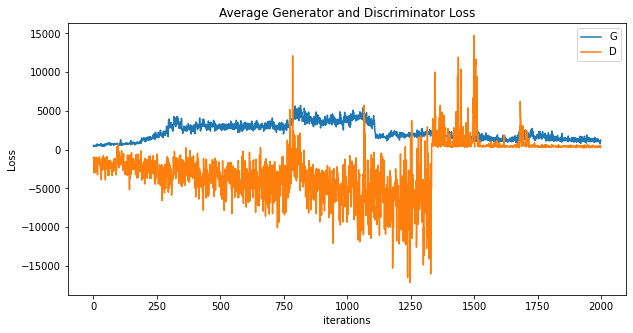

CPU times: user 22min 33s, sys: 40.7 s, total: 23min 13s
Wall time: 26min 15s


In [ ]:
%%time
run_experiment(df_new=df, pos_num_inst=6290, neg_num_inst=19758, num_epochs=2000, out_sh=14)